## HR Analytics: Job Change of Data Scientists

![](Human_Resource.png)

Kaggles Link: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.


#### Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

#### Features:

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

## Importing and  Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.shape

(19158, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
for i in df.columns:
    print('Uniques values in {} are: {}\n'.format(i, df[i].unique()))
    print((df[i].value_counts(normalize= True).head(10)*100).round(2))
    print('-'*100)

Uniques values in enrollee_id are: [ 8949 29725 11561 ... 24576  5756 23834]

2047     0.01
2692     0.01
4743     0.01
27272    0.01
25225    0.01
31370    0.01
19084    0.01
23182    0.01
10896    0.01
14994    0.01
Name: enrollee_id, dtype: float64
----------------------------------------------------------------------------------------------------
Uniques values in city are: ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_2

In [8]:
# Missing Values

df.gender= df.gender.fillna('Unknow')
df.enrolled_university= df.enrolled_university.fillna('no_enrollment')
df.education_level= df.education_level.fillna('Graduate')
df.major_discipline= df.major_discipline.fillna('STEM')
df.experience= df.experience.fillna('20')
df.company_size= df.company_size.fillna('50-99')
df.company_type= df.company_type.fillna('Pvt Ltd')
df.last_new_job= df.last_new_job.fillna('1')

In [9]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## Data Visualization

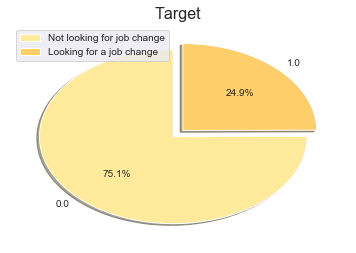

In [10]:
sns.set_style('darkgrid')
sns.set_palette('YlOrRd')

df_target= df.target.value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', startangle= 90, explode= [0.05, 0.05], shadow = True )
plt.legend(['Not looking for job change', 'Looking for a job change'])
plt.title('Target', fontsize= 16)

plt.show()

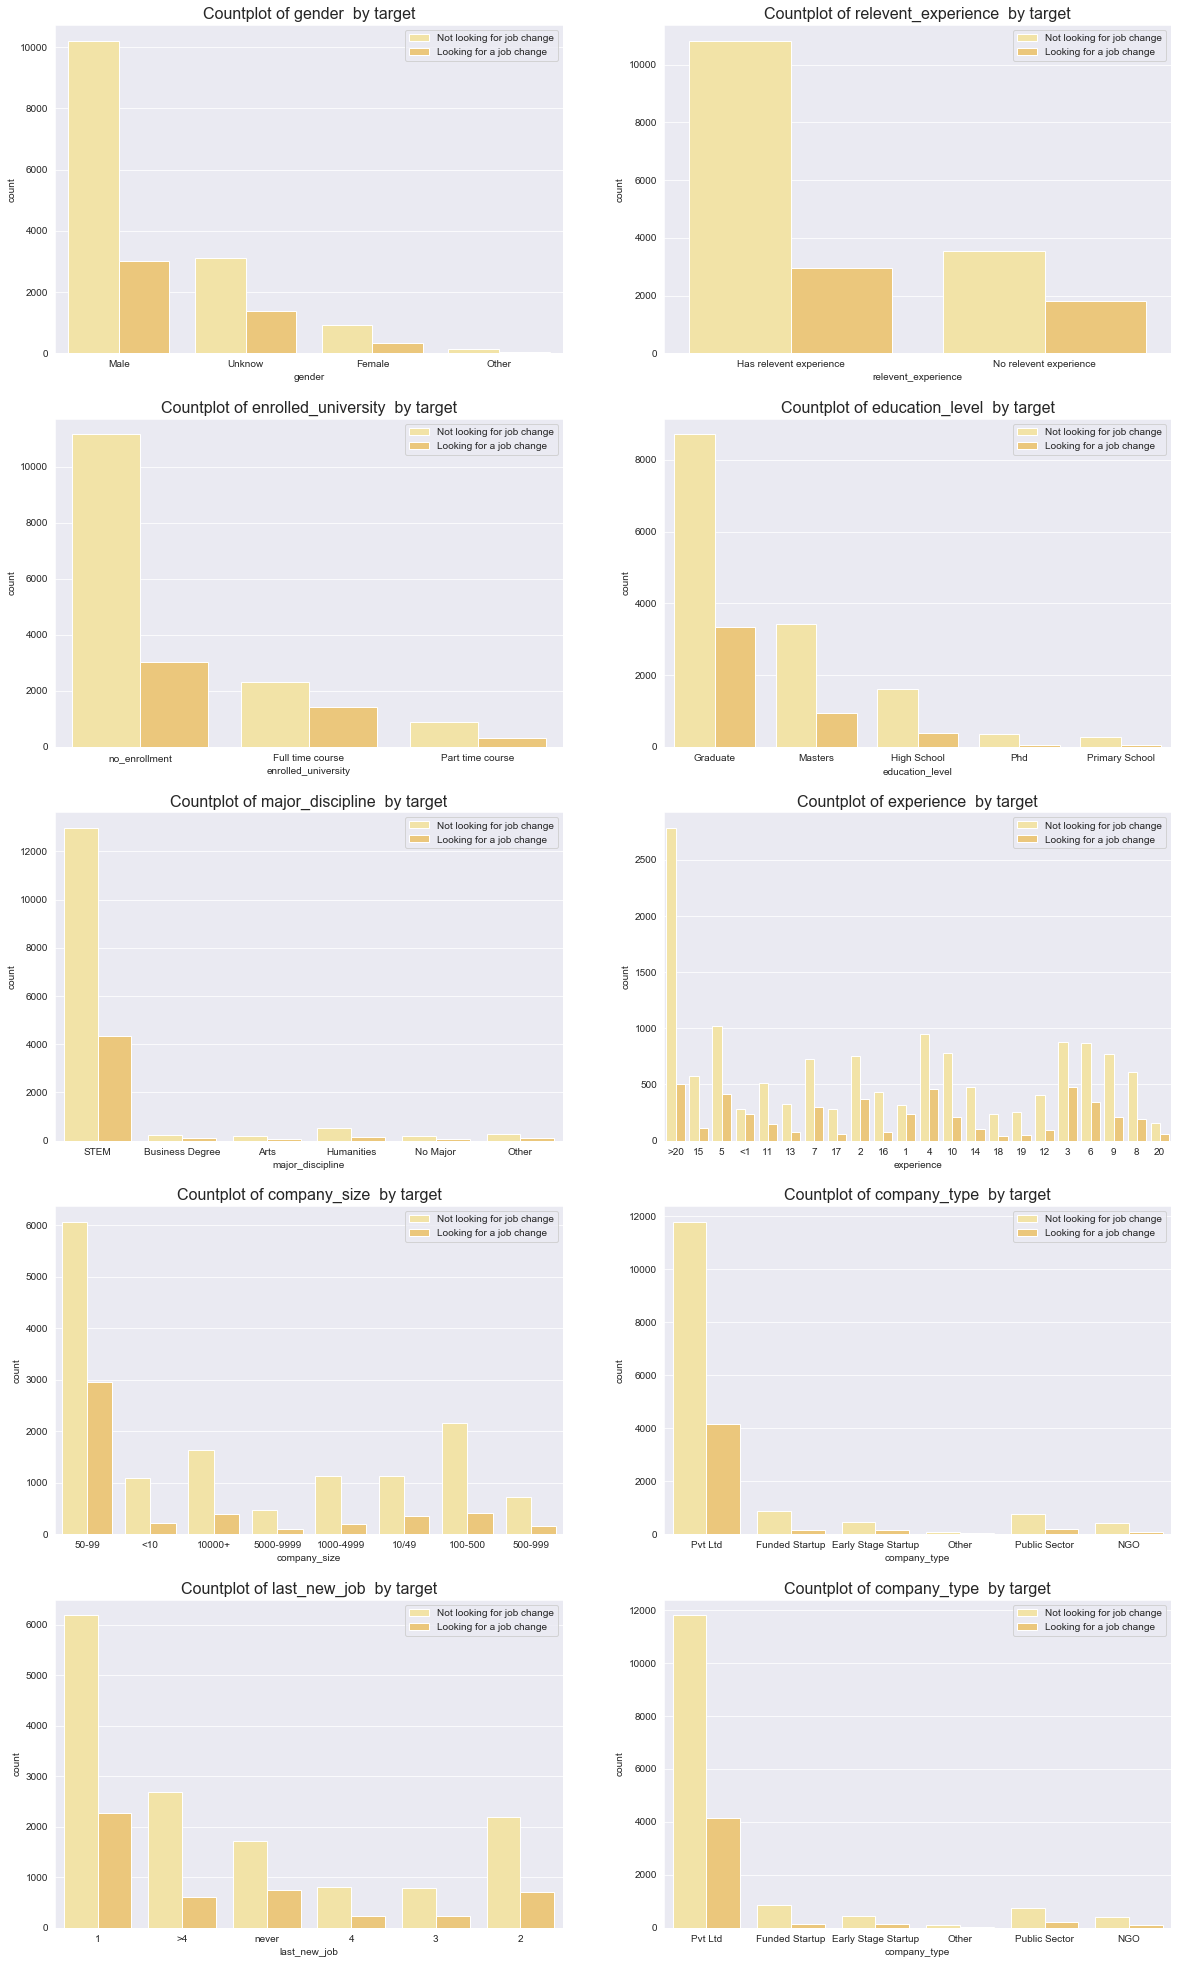

In [11]:
lista= ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
       'major_discipline', 'experience', 'company_size','company_type','last_new_job','company_type']

plt.figure(figsize= (20,35))

n=1
for i in lista:
    plt.subplot(5,2,n)
    sns.countplot(x= i, hue= 'target', data= df)
    plt.title("Countplot of {}  by {}".format( i, 'target'), fontsize= 16)
    plt.legend(['Not looking for job change', 'Looking for a job change'])
    n +=1


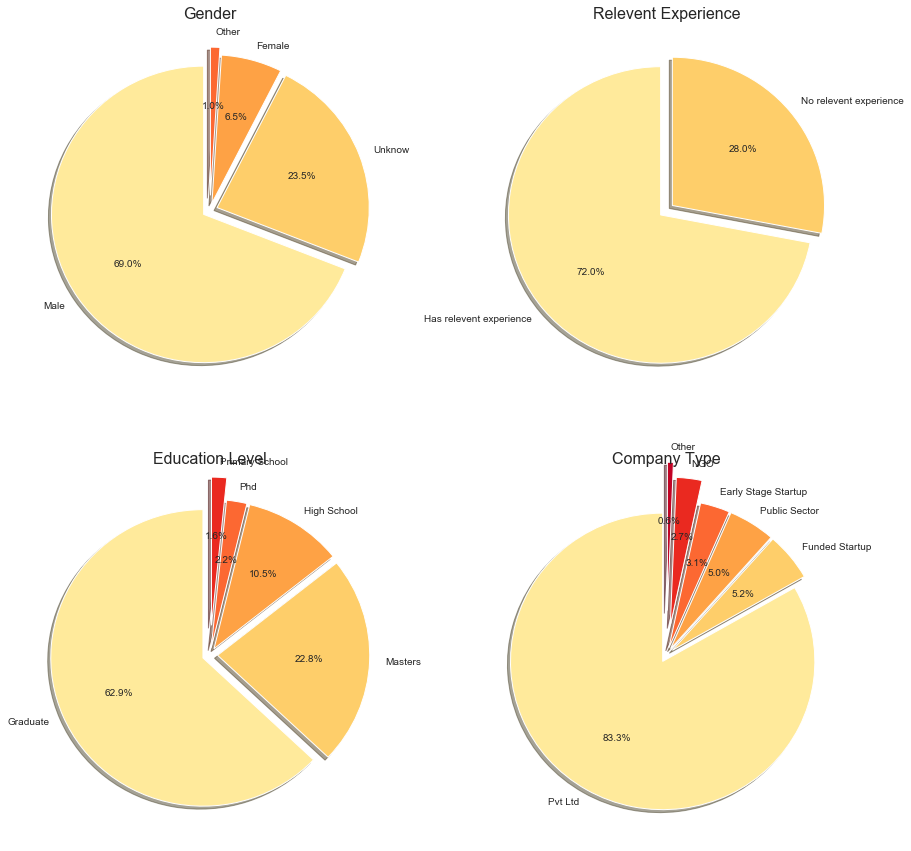

In [12]:
plt.figure(figsize= (15, 15))

plt.subplot(2,2,1)
df_gender= df.gender.value_counts()
plt.pie(df_gender, labels= df_gender.index, autopct= '%.1f%%', startangle= 90, 
        explode= [0.05, 0.05, 0.05, 0.1], shadow = True )
plt.title('Gender', fontsize= 16)

plt.subplot(2,2,2)
df_relevent_experience= df.relevent_experience.value_counts()
plt.pie(df_relevent_experience, labels= df_relevent_experience.index, autopct= '%.1f%%', startangle= 90,
        explode= [0.05, 0.05], shadow = True )
plt.title('Relevent Experience', fontsize= 16)

plt.subplot(2,2,3)
df_education_level= df.education_level.value_counts()
plt.pie(df_education_level, labels= df_education_level.index, autopct= '%.1f%%', startangle= 90, 
        explode= [0.05, 0.05, 0.05, 0.05, 0.2], shadow = True )
plt.title('Education Level', fontsize= 16)

plt.subplot(2,2,4)
df_company_type= df.company_type.value_counts()
plt.pie(df_company_type, labels= df_company_type.index, autopct= '%.1f%%', startangle= 90, 
        explode= [0.05, 0.05, 0.05, 0.05, 0.2, 0.3], shadow = True )
plt.title('Company Type', fontsize= 16)

plt.show()

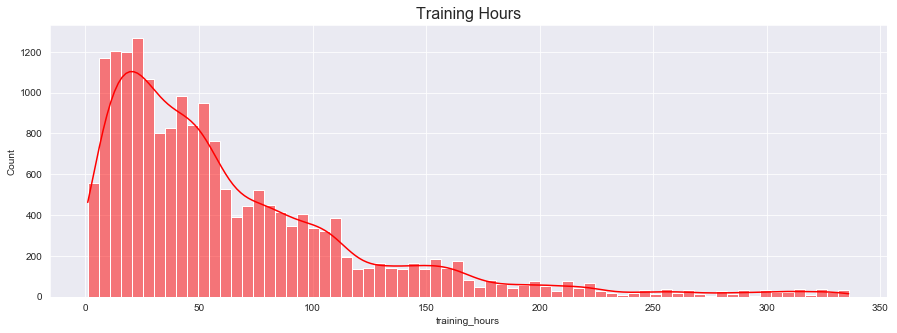

In [13]:
plt.figure(figsize= (15,5))
sns.histplot(x= df.training_hours, kde= True, color= 'r')
plt.title('Training Hours', fontsize= 16)
plt.show()

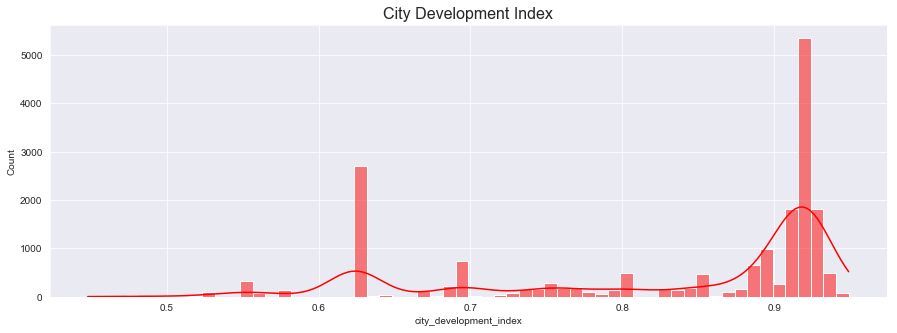

In [14]:
plt.figure(figsize= (15,5))
sns.histplot(x= df.city_development_index, kde= True, color= 'r', bins= 60)
plt.title('City Development Index', fontsize= 16)
plt.show()

## Transforming Data

In [15]:
def gender_to_numeric(x):
    if x=='Unknow': return 3
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5 
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [16]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

In [17]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1,1,0,0,0,21,5,0,1,36,1.0
1,29725,1,0.776,1,0,0,0,0,15,5,0,5,47,0.0
2,11561,2,0.624,3,0,1,0,0,5,5,0,0,83,0.0
3,33241,3,0.789,3,0,0,0,1,0,5,0,0,52,1.0
4,666,4,0.767,1,1,0,1,0,21,5,1,4,8,0.0


In [18]:
for i in df.columns:
    print('Unique values {} are {}\n'.format(i, df[i].unique()))
    print('-'*100)

Unique values enrollee_id are [ 8949 29725 11561 ... 24576  5756 23834]

----------------------------------------------------------------------------------------------------
Unique values city are [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]

----------------------------------------------------------------------------------------------------
Unique values city_development_index are [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.

In [19]:
df.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

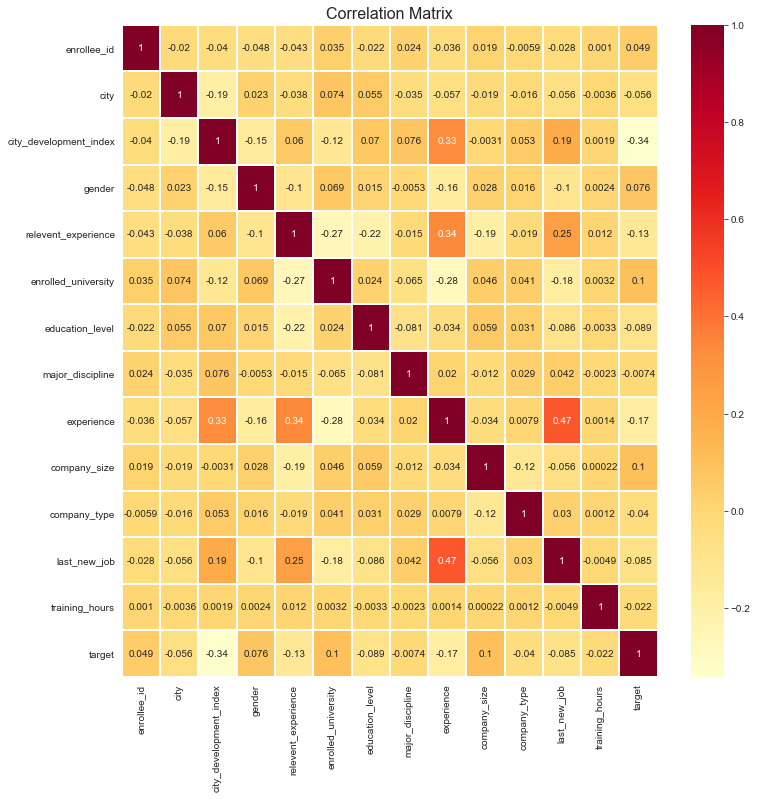

In [20]:
corr= df.corr()

plt.figure(figsize= (12,12))
sns.heatmap(corr, annot= True, linewidths= 1, cmap= 'YlOrRd')
plt.title('Correlation Matrix', fontsize= 16)

plt.show()

## Machine Learning

### Train Data

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:
seed= 123
np.random.seed(seed)

x= df.drop(columns= 'target')
y= df.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, stratify= y)

In [23]:
pipelines= []

pipelines.append(('AdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostClassifier())])))
pipelines.append(('RandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestClassifier(max_depth= 3))])))
pipelines.append(('DecisionTree', Pipeline([('Scaler', StandardScaler()),('DecisionTree', DecisionTreeClassifier(max_depth= 3))])))
pipelines.append(('Logistic', Pipeline([('Scaler', StandardScaler()),('Logistic', LogisticRegression())])))
pipelines.append(('KNeighbors', Pipeline([('Scaler', StandardScaler()),('KNeighbors', KNeighborsClassifier())])))
pipelines

[('AdaBoost',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('AdaBoost', AdaBoostClassifier())])),
 ('RandomForest',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('RandomForest', RandomForestClassifier(max_depth=3))])),
 ('DecisionTree',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('DecisionTree', DecisionTreeClassifier(max_depth=3))])),
 ('Logistic',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Logistic', LogisticRegression())])),
 ('KNeighbors',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('KNeighbors', KNeighborsClassifier())]))]

In [24]:
np.random.seed(seed)

results= []
names= []

for name, model in pipelines:
    kfold= KFold(n_splits= 10, shuffle= True)
    cv_results= cross_val_score(estimator= model, X= x_train, y= y_train, scoring= 'accuracy', cv= kfold)*100
    results.append(cv_results)
    names.append(name)
    mean= cv_results.mean()
    std= cv_results.std()
    print('{:15} : Average Accuracy {:.2f}% - Std {:.2f}%'.format(
        name, mean, std))

AdaBoost        : Average Accuracy 77.24% - Std 1.05%
RandomForest    : Average Accuracy 75.68% - Std 1.33%
DecisionTree    : Average Accuracy 77.69% - Std 1.09%
Logistic        : Average Accuracy 76.70% - Std 1.26%
KNeighbors      : Average Accuracy 74.75% - Std 1.10%


Text(0.5,1,'Models Comparison')

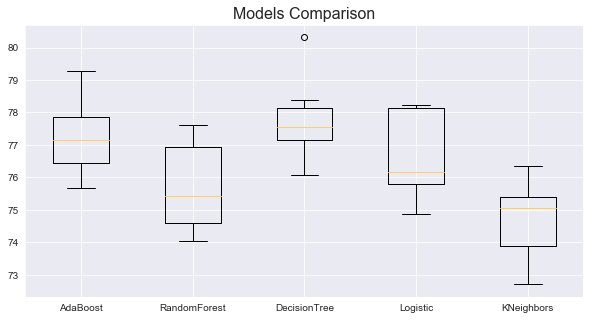

In [25]:
plt.figure(figsize= (10,5))
plt.boxplot(results, labels= names)
plt.title('Models Comparison', fontsize= 16)

In [26]:
np.random.seed(seed)

criterion_values= ['gini', 'entropy']
splitter_values= ['best', 'random']
max_depth_values= [2,3,4,5,6]
params_values= dict(criterion= criterion_values, splitter= splitter_values, max_depth= max_depth_values)

model= DecisionTreeClassifier()
kfold= KFold(n_splits= 10, shuffle= True)
grid= GridSearchCV(estimator= model, param_grid= params_values, scoring= 'accuracy', cv= kfold)
grid_results= grid.fit(x_train, y_train)
print('BEST: Accuracy {:.2f}% - Params {}'.format(grid_results.best_score_*100, grid_results.best_params_))

means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('Average Accuracy {:.2f}% - Std {:.2f}% - Params {}'.format(mean*100, std*100, param))


BEST: Accuracy 77.86% - Params {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
Average Accuracy 77.78% - Std 0.91% - Params {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
Average Accuracy 75.21% - Std 1.71% - Params {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
Average Accuracy 77.82% - Std 0.92% - Params {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
Average Accuracy 76.45% - Std 1.40% - Params {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
Average Accuracy 77.84% - Std 0.91% - Params {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
Average Accuracy 77.02% - Std 1.30% - Params {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
Average Accuracy 77.69% - Std 0.98% - Params {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Average Accuracy 77.52% - Std 1.15% - Params {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Average Accuracy 77.42% - Std 1.03% - Params {'criterion': 'gini', 'max_dept

In [27]:
np.random.seed(seed)

model= DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, splitter= 'best')
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8287    0.9082    0.8667      4315
         1.0     0.6114    0.4348    0.5082      1433

    accuracy                         0.7902      5748
   macro avg     0.7201    0.6715    0.6874      5748
weighted avg     0.7745    0.7902    0.7773      5748

Accuracy: 79.02%



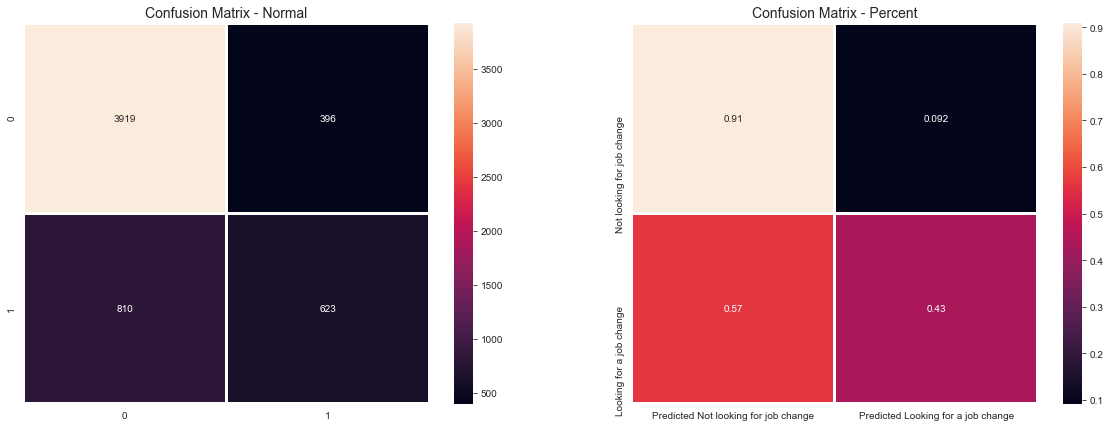

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

print("Accuracy: {:.2f}%\n".format(accuracy_score(y_test, y_pred)*100))

# Confusion Matrix 
plt.figure(figsize= (20,7))

# Normal
plt.subplot(1,2,1)
cm= confusion_matrix(y_test, y_pred)
labels= ['Not looking for job change', 'Looking for a job change']
sns.heatmap(cm, annot= True, linewidths= 2, fmt= 'd')
plt.title('Confusion Matrix - Normal', fontsize= 14)


# Percent
plt.subplot(1,2,2)
cmp= confusion_matrix(y_test, y_pred, normalize= 'true')
xlabels= ['Predicted Not looking for job change', 'Predicted Looking for a job change']
ylabels= ['Not looking for job change', 'Looking for a job change']
sns.heatmap(cmp, annot= True, linewidths= 2, fmt= '.2g', xticklabels= xlabels, yticklabels= ylabels)
plt.title('Confusion Matrix - Percent', fontsize= 14)

plt.show()